In [1]:
# Create Latitude and Longitude Combinations

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Error: Says add to API_practice

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ust-omchug ru
ushuaia ar
hilo us
kapaa us
saint-philippe re
albany au
atar mr
yulara au
college us
kozhevnikovo ru
puerto baquerizo moreno ec
albany au
huangpi cn
banjar id
taolanaro mg
taolanaro mg
lebu cl
rawson ar
kapaa us
culleredo es
punta arenas cl
attawapiskat ca
punta arenas cl
najran sa
iqaluit ca
port elizabeth za
ushuaia ar
vaini to
grand-lahou ci
jamestown sh
leningradskiy ru
longyearbyen sj
sal rei cv
qaanaaq gl
rikitea pf
isangel vu
ostrovnoy ru
thinadhoo mv
yellowknife ca
tiznit ma
port alfred za
thompson ca
rikitea pf
rikitea pf
bluff nz
kungurtug ru
victoria sc
busselton au
pingliang cn
bambari cf
hovd mn
makakilo city us
codrington ag
esil kz
kamenskoye ru
lata sb
fairbanks us
port alfred za
hobart au
clonakilty ie
bowen au
saint-philippe re
komsomolets kz
thompson ca
redlands us
atuona pf
rikitea pf
victoria sc
constitucion cl
birin dz
gondanglegi id
sangeorz-bai ro
vaini to
khatanga ru
jimeta ng
qaanaaq gl
hithadhoo mv
punta arenas cl
ponta do sol cv
saint-philippe 

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
import requests
requests.__version__

'2.27.1'

In [9]:
# Get the City Weather Data

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-omchug
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | atar
Processing Record 8 of Set 1 | yulara
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | kozhevnikovo
Processing Record 11 of Set 1 | puerto baquerizo moreno
Processing Record 12 of Set 1 | huangpi
Processing Record 13 of Set 1 | banjar
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | rawson
Processing Record 17 of Set 1 | culleredo
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | najran
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of 

In [13]:
# Count cities
len(city_data)

570

In [14]:
# Create a DataFrame of City Weather Data

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ust-Omchug,61.1500,149.6333,69.64,52,26,6.29,RU,2022-07-10 21:17:06
1,Ushuaia,-54.8000,-68.3000,33.46,69,40,3.44,AR,2022-07-10 21:17:07
2,Hilo,19.7297,-155.0900,84.27,89,100,4.00,US,2022-07-10 21:13:55
3,Kapaa,22.0752,-159.3190,84.52,72,20,17.27,US,2022-07-10 21:17:07
4,Saint-Philippe,-21.3585,55.7679,63.21,76,37,13.60,RE,2022-07-10 21:17:08
5,Albany,42.6001,-73.9662,81.68,35,84,3.22,US,2022-07-10 21:14:39
6,Atar,20.5169,-13.0499,101.44,11,0,8.95,MR,2022-07-10 21:17:08
7,Yulara,-25.2406,130.9889,43.20,48,0,6.22,AU,2022-07-10 21:17:08
8,College,64.8569,-147.8028,68.58,84,75,0.00,US,2022-07-10 21:17:09
9,Kozhevnikovo,56.2589,83.9714,64.26,89,32,5.77,RU,2022-07-10 21:17:09


In [16]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [17]:
# Set new column order
city_data_df = city_data_df[new_column_order]

In [18]:
# Show data frame
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ust-Omchug,RU,2022-07-10 21:17:06,61.1500,149.6333,69.64,52,26,6.29
1,Ushuaia,AR,2022-07-10 21:17:07,-54.8000,-68.3000,33.46,69,40,3.44
2,Hilo,US,2022-07-10 21:13:55,19.7297,-155.0900,84.27,89,100,4.00
3,Kapaa,US,2022-07-10 21:17:07,22.0752,-159.3190,84.52,72,20,17.27
4,Saint-Philippe,RE,2022-07-10 21:17:08,-21.3585,55.7679,63.21,76,37,13.60
...,...,...,...,...,...,...,...,...,...
565,Rio Grande,BR,2022-07-10 21:15:33,-32.0350,-52.0986,69.94,85,90,11.41
566,Finnsnes,NO,2022-07-10 21:20:09,69.2296,17.9811,56.75,85,39,2.91
567,Non Sang,TH,2022-07-10 21:20:10,16.8687,102.5664,76.68,91,100,2.95
568,Koumac,NC,2022-07-10 21:20:10,-20.5667,164.2833,76.71,83,8,7.40


In [19]:
# Create an Output file to save the DataFrame as a csv in new folder

In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Get Data for Plotting

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1657488012.9685626

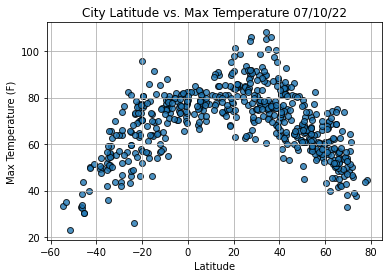

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [25]:
# Plot Latitude vs. Humidity

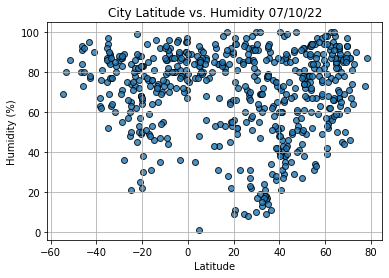

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [27]:
# Plot Latitude vs. Cloudiness

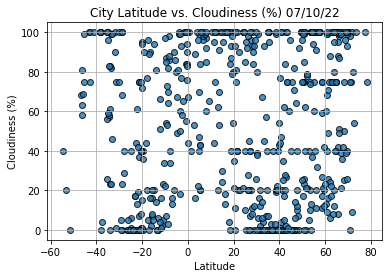

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [29]:
# Plot Latitude vs. Wind Speed

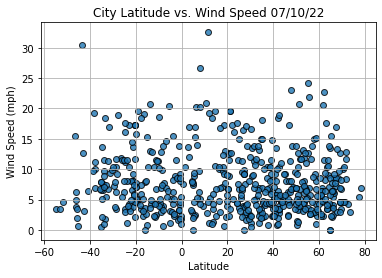

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Find the correlation Between Latitude and maximum Temperature

In [32]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [33]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [57]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                         Lebu
Country                        CL
Date          2022-07-10 21:16:59
Lat                      -37.6167
Lng                        -73.65
Max Temp                    49.66
Humidity                       81
Cloudiness                      4
Wind Speed                   6.96
Name: 13, dtype: object

In [35]:
 # Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
565    False
566     True
567     True
568    False
569     True
Name: Lat, Length: 570, dtype: bool

In [36]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ust-Omchug,RU,2022-07-10 21:17:06,61.1500,149.6333,69.64,52,26,6.29
2,Hilo,US,2022-07-10 21:13:55,19.7297,-155.0900,84.27,89,100,4.00
3,Kapaa,US,2022-07-10 21:17:07,22.0752,-159.3190,84.52,72,20,17.27
5,Albany,US,2022-07-10 21:14:39,42.6001,-73.9662,81.68,35,84,3.22
6,Atar,MR,2022-07-10 21:17:08,20.5169,-13.0499,101.44,11,0,8.95


In [37]:
 # Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [38]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

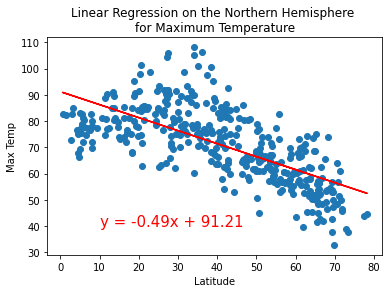

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

In [40]:
# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

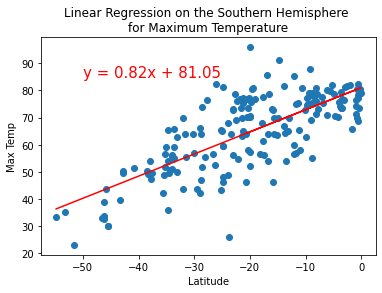

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

In [42]:
# Find the Correlation Between Latitude and Percent Humidity

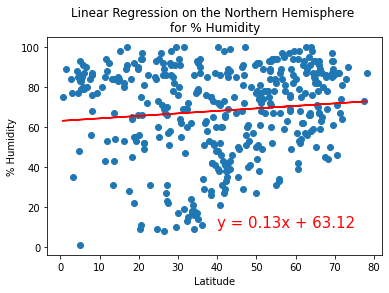

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

In [44]:
# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

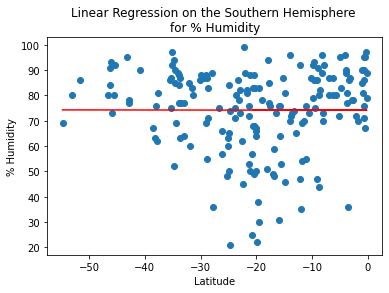

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

In [46]:
# Find the Correlation Between Latitude and Percent Cloudiness

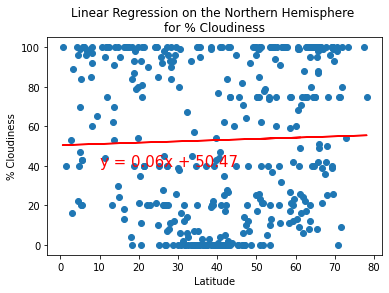

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

In [48]:
# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

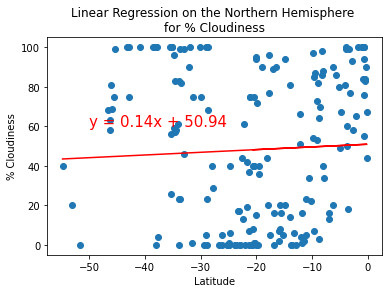

In [49]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

In [50]:
# Find the Correlation Between Latitude and Wind Speed

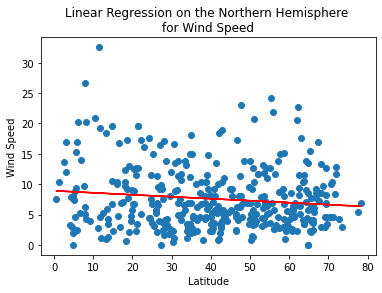

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

In [52]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere

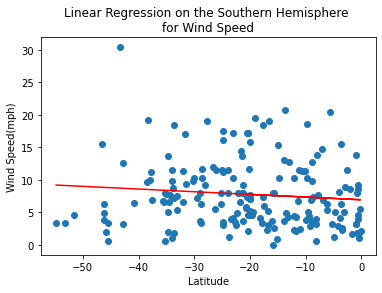

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))

In [54]:
# Install the gmaps Dependency

In [55]:
conda install -c conda-forge gmaps


Note: you may need to restart the kernel to use updated packages.


In [56]:

pip install gmaps

     ---------------------------------------- 1.1/1.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076111 sha256=a3e5cf3b8606e755fd2b098d5e19e8d209745bac4bae03c986c55d594c674537
  Stored in directory: c:\users\kylekato\appdata\local\pip\cache\wheels\3d\1c\cb\c46f4199210e632b28d78d05a00bfdccbf6dfcd3f5b051d6bf
Successfully built gmaps
Note: you may need to restart the kernel to use updated packages.
